In [1]:
#數據來自 http://brucehardie.com/datasets/ 
#CDNOW dataset (full dataset) 
# user_id 用户ID
# order_dt: 消费日期
# order_products: 消费产品数量
# order_amount: 消费金额

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [101]:
# txt格式用read_table 如果有多个字符串 sep ='\s+' 正常csv用的是 ','
#命名列名
columns=['user_id',"order_dt",'order_products','order_amount']
df=pd.read_table('CDNOW_master.txt',names=columns,sep='\s+')
df.head()

,user_id,order_dt,order_products,order_amount
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


In [102]:
#共69659行、4列，前3列为整数类型，第4列为浮点型，
#各列行数与总行数69659一致，说明数据无空值
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         69659 non-null  int64  
 1   order_dt        69659 non-null  int64  
 2   order_products  69659 non-null  int64  
 3   order_amount    69659 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


In [103]:
df.describe()
#大部分订单只消费了少量商品（平均2.4件），中位数为2件，说明有一定极值干扰拉高了平均值
#用户的消费金额比较稳定，平均消费35元，中位数在25元，同样说明有一定极值干扰

,user_id,order_dt,order_products,order_amount
count,69659.000000,6.965900e+04,69659.000000,69659.000000
mean,11470.854592,1.997228e+07,2.410040,35.893648
std,6819.904848,3.837735e+03,2.333924,36.281942
min,1.000000,1.997010e+07,1.000000,0.000000
25%,5506.000000,1.997022e+07,1.000000,14.490000
50%,11410.000000,1.997042e+07,2.000000,25.980000
75%,17273.000000,1.997111e+07,3.000000,43.700000
max,23570.000000,1.998063e+07,99.000000,1286.010000


In [104]:
# to_datetime  日期转换函数  
# format 日期格式：Y代表四位年份 y两位年份 M分钟 m月份 d天
df['order_dt']=pd.to_datetime(df.order_dt,format="%Y%m%d")

In [105]:
#新增一列月份month   [M]代表月份  values将其转换成数组 否则会报错
df['month']=df.order_dt.values.astype('datetime64[M]')

In [106]:
#按月分组
grouped_month=df.groupby('month')
#月消费总金额 = 按月分组.消费金额.sum() 
order_month_amount=grouped_month.order_amount.sum()
order_month_amount.head()

month
1997-01-01    299060.17
1997-02-01    379590.03
1997-03-01    393155.27
1997-04-01    142824.49
1997-05-01    107933.30
Name: order_amount, dtype: float64

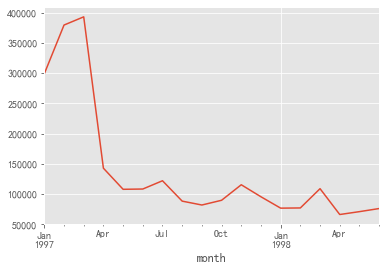

In [107]:
order_month_amount.plot()

#消费金额在前三个月达最高峰（接近400000元），而后出现断崖式下跌，
#后期每月消费金额较为平稳（80000元左右），有轻微下降趋势

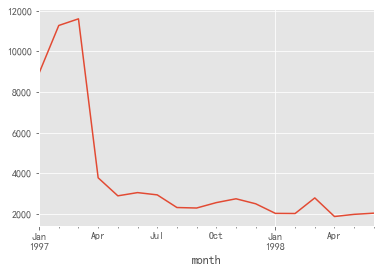

In [108]:
#月订单数
grouped_month.user_id.count().plot()

# 用户月消费次数与金额的曲线大致相同，都是前三个月达到峰值（均值10000次左右）
# 后断崖式下跌，而后趋于平稳（2500次左右）且有轻微下降趋势

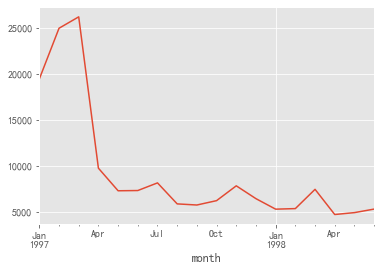

In [109]:
# 月产品购买数量
grouped_month.order_products.sum().plot()

#消费产品的数量同样呈现早期购买量较多，后期下降趋于平稳的趋势

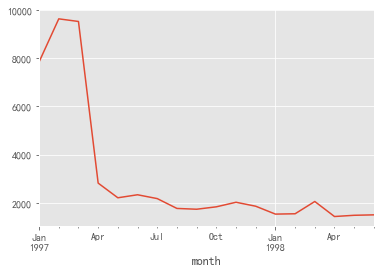

In [110]:
"""
先按月聚合 df.groupby('month')；
duplicates去重；
求去重个数 len(x.drop_duplicates())；
"""
grouped_month.user_id.apply(lambda x:len(x.drop_duplicates())).plot()

#月消费人数（前三个月峰值不超过10000，平均在9000左右）小于月消费次数，但差异不大，说明出现了小范围的复购

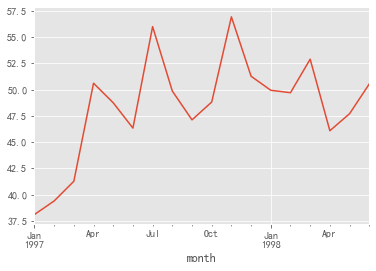

In [111]:
#每月用户平均消费金额 = 月分组.总金额/用户数
((grouped_month.order_amount.sum())/(grouped_month.user_id.apply(lambda x :len(x.drop_duplicates())))).plot()

#前三个月用户平均消费在40元左右，后续月份用户平均消费金额比前三个月提高一些，平均消费金额在[45,57.5]之间

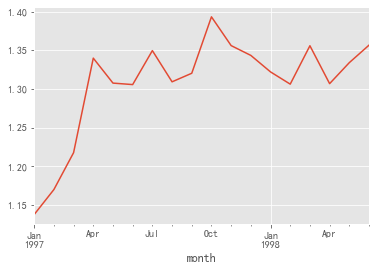

In [112]:
#每月用户平均消费次数的趋势 =消费总次数/消费用户数
((grouped_month.user_id.count())/(grouped_month.user_id.apply(lambda x:len(x.drop_duplicates())))).plot()

#前三个月月平均消费次数逐渐上升，后面在1.3-1.4次之间波动

In [113]:
#用户消费金额、消费次数的描述统计
grouped_user=df.groupby('user_id')
grouped_user.sum().describe()

#每个用户平均购买7件产品，中位数为3件，
#说明存在少量用户买了大量产品的情况对平均值结果进行了干扰，标准差为16，说明波动较大

,order_products,order_amount
count,23570.000000,23570.000000
mean,7.122656,106.080426
std,16.983531,240.925195
min,1.000000,0.000000
25%,1.000000,19.970000
50%,3.000000,43.395000
75%,7.000000,106.475000
max,1033.000000,13990.930000


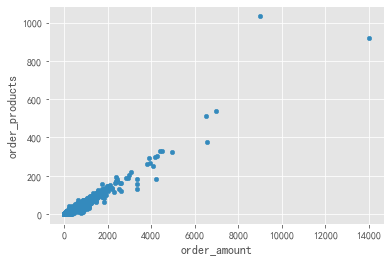

In [114]:
#用户消费金额和消费次数的散点图
grouped_user.sum().plot.scatter(x='order_amount',y='order_products')

#大部分消费金额集中在4000内，4000以上的几个为极值，对结果影响较大，所以过滤掉该部分极值

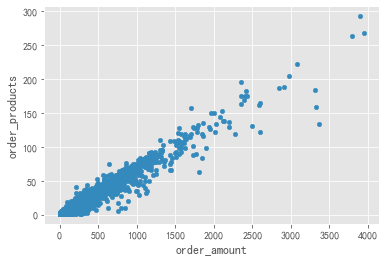

In [115]:
grouped_user.sum().query('order_amount < 4000').plot.scatter(x='order_amount',y='order_products')

#由以上过滤后的散点图可知，消费金额和消费产品数呈线性趋势，说明产品的价格（价格=金额/数量）比较平均、稳定

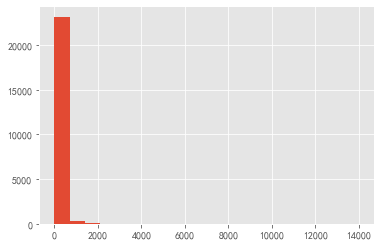

In [116]:
# 用户消费金额的分布图 （直方图） bins = 20 将x值平均分成20份 
grouped_user.sum().order_amount.hist(bins=20)

#由以上直方图可知，绝大多数用户消费金额呈集中趋势，小部分异常值干扰了判断

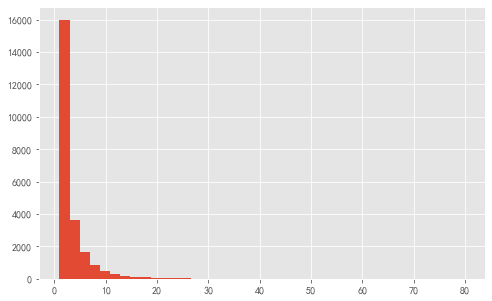

In [117]:
#调整图表尺寸
plt.figure(figsize=(8,5))
#为避免极值干扰结果，中间使用query函数过滤掉极值
#过滤值选择数值100的理由：由切比雪夫定理，即95%的数据集中在距离平均数5个标准差之内
#消费产品数平均值为7，标准差为17 所以上限=7+17*5 约为100
grouped_user.count().query('order_products < 100').order_products.hist(bins=40)

#从直方图看，大部分用户的消费能力确实不高，大多只消费了一次或两次，高消费用户在图上几乎看不到，这也确实符合消费行为的行业规律，即“二八法则

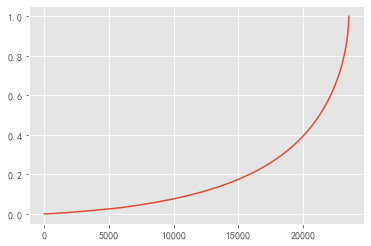

In [118]:
#用户累计消费金额占比（百分之多少的用户占了百分之多少的消费额）
# 按用户分组并求和,再对订单金额进行排序(默认从小到大),最后通过匿名函数对每一行进行累计求和占比
user_cumsum=grouped_user.sum().sort_values('order_amount').apply(lambda x :x.cumsum()/x.sum())
user_cumsum.order_amount.cumsum()/user_cumsum.order_amount.sum()
#对计算后的用户消费金额重新排序后绘图
user_cumsum.reset_index().order_amount.plot()

#按用户的消费金额进行升序排序，50%的用户仅贡献了15%的消费额度。而排名前5000的用户就贡献了60%的消费额

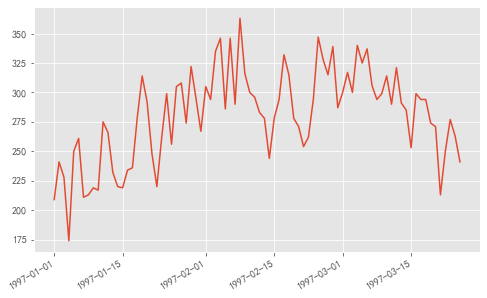

In [119]:
#用户第一次消费分布（首购）
plt.figure(figsize=(8,5))
grouped_user.min().order_dt.value_counts().plot()

#运营前3个月首购人数呈上升趋势，直至2月7日左右出现明显下跌后首购人数开始呈下降趋势，
#猜想：有可能是2月份对新人的活动力度减弱了？被什么节日影响

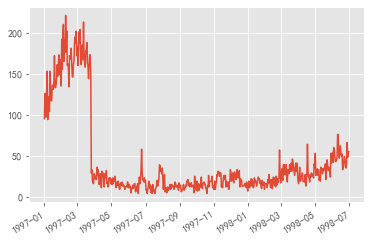

In [120]:
#用户最后一次消费
grouped_user.max().order_dt.value_counts().plot()

#用户最后一次购买的分布比第一次分布广，大部分用户最后一次购买集中在前三个月，到第三个月时出现断崖式下跌，猜想前三个月第一次消费与最后一次消费的人是同一批人，即只消费了一次的那部分用户
#随着时间递增，最后一次购买数也在递增，消费呈现流失上升的状况

In [121]:
#多少用户仅消费了一次
user_life=grouped_user.order_dt.agg(['min','max'])
user_life.head()

,min,max
user_id,,
1,1997-01-01,1997-01-01
2,1997-01-12,1997-01-12
3,1997-01-02,1998-05-28
4,1997-01-01,1997-12-12
5,1997-01-01,1998-01-03


In [122]:
# 最早消费时间与最后消费时间一致表示只消费了一次，显示为True
(user_life['min'] == user_life['max']).value_counts()

#超过一半的用户就只消费了一次

True     12054
False    11516
dtype: int64

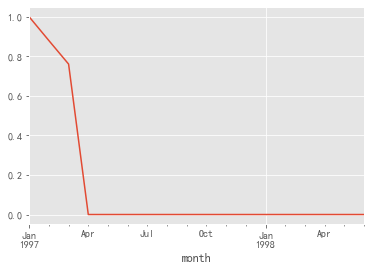

In [123]:
#每月新客占比？
#按月份和用户ID分组
grouped_month_user=df.groupby(['month','user_id'])
#将 当月用户订单日期最小值 与 用户订单日期最小值 联结
tmp=grouped_month_user.order_dt.agg(['min']).join(grouped_user.order_dt.min())
# 判断用户当月订单日期最小值是否与用户订单日期最小值相等，新建字段old,old代表老客户
tmp['old']=(tmp['min']==tmp.order_dt)
# 重置索引列,并按月分组,作新客占比折线图
tmp.reset_index().groupby('month').old.apply(lambda x :x.sum()/x.count()).plot()

In [124]:
#用戶分層  RFM
#新建数据透视表
RFM=df.pivot_table(index='user_id',
                  values=['order_products','order_amount','order_dt'],
                  aggfunc={'order_dt':'max','order_amount':'sum','order_products':'sum'})
RFM.head()

,order_amount,order_dt,order_products
user_id,,,
1,11.77,1997-01-01,1
2,89.00,1997-01-12,6
3,156.46,1998-05-28,16
4,100.50,1997-12-12,7
5,385.61,1998-01-03,29


In [125]:
#定义参数R 
RFM['R']=-(RFM.order_dt-RFM.order_dt.max())/np.timedelta64(1,'D')
RFM.rename(columns={'order_products':'F','order_amount':'M'},inplace=True)

# R:最后一次消费距离统计日期之间的天数，天数越小代表用户价值越高
# F:消费总商品数，越大用户价值越高
# M:消费总金额，越大用户价值越高

In [126]:
#匿名函数，分别计算R F M 与平均值之间的差 
RFM[['R','F','M']].apply(lambda x:x-x.mean())

,R,F,M
user_id,,,
1,177.778362,-6.122656,-94.310426
2,166.778362,-1.122656,-17.080426
3,-334.221638,8.877344,50.379574
4,-167.221638,-0.122656,-5.580426
5,-189.221638,21.877344,279.529574
...,...,...,...
23566,94.778362,-5.122656,-70.080426
23567,94.778362,-6.122656,-85.110426
23568,66.778362,-1.122656,15.619574


In [127]:
# 定义用户八个层级，根据业务定义打分
def rfm_func(x):
    level=x.apply(lambda x:'1' if x>=0 else '0')
    #label標籤，字符串拼接 '+'
    label=level.R+level.F+level.M
    d={
        '111':'重要價值客戶',
        '011':'重要保持客戶',
        '101':'重要挽留客戶',
        '001':'重要發展客戶',
        '110':'一般價值客戶',
        '010':'一般保持客戶',
        '100':'一般挽留客戶',
        '000':'一般發展客戶',
    }
    result=d[label]
    return result
RFM['label']=RFM[['R','F','M']].apply(lambda x :x-x.mean()).apply(rfm_func,axis=1)

In [128]:
#计算八个层级客户的R、F、M和
RFM.groupby('label').sum()

#重要保持客户的消费金额远大于其他层级用户，
#说明该部分用户对公司收益的贡献较大，尽力维护这部分用户公司利益也将得到较大保障

,M,F,R
label,,,
一般保持客戶,19937.45,1712,29448.0
一般價值客戶,7181.28,650,36295.0
一般挽留客戶,438291.81,29346,6951815.0
一般發展客戶,196971.23,13977,591108.0
重要保持客戶,1592039.62,107789,517267.0
重要價值客戶,167080.83,11121,358363.0
重要挽留客戶,33028.40,1263,114482.0
重要發展客戶,45785.01,2023,56636.0


In [129]:
RFM.groupby('label').count()

#得到客户数量分布，不够直观

,M,order_dt,F,R
label,,,,
一般保持客戶,206,206,206,206
一般價值客戶,77,77,77,77
一般挽留客戶,14074,14074,14074,14074
一般發展客戶,3300,3300,3300,3300
重要保持客戶,4554,4554,4554,4554
重要價值客戶,787,787,787,787
重要挽留客戶,241,241,241,241
重要發展客戶,331,331,331,331


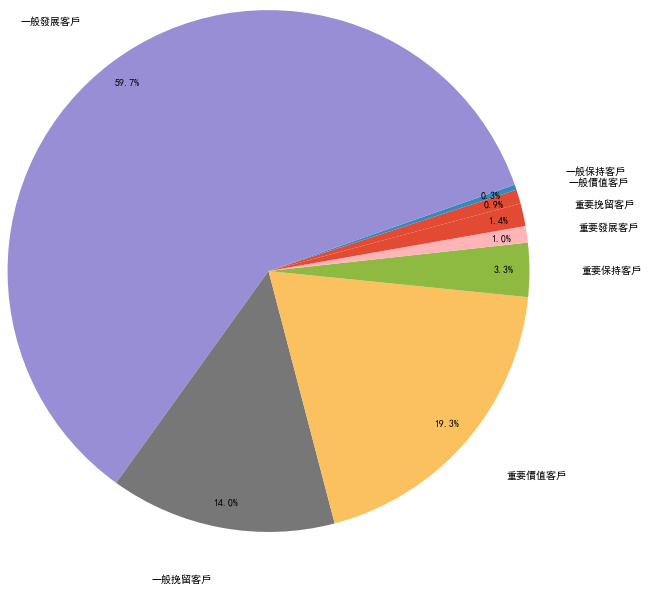

In [130]:
#各类客户占比
user_c=RFM.groupby('label').count()
#避免压缩为椭圆
plt.axis('equal')
#定义标签列表
labels=['一般價值客戶','一般保持客戶','一般發展客戶','一般挽留客戶',
       '重要價值客戶','重要保持客戶','重要發展客戶','重要挽留客戶',]
#绘制饼图  按月对客户数计数，
plt.pie(user_c['M'],
       autopct='%3.1f%%',
       labels=labels,
       pctdistance=0.9,
       labeldistance=1.2,
       radius=3,
       startangle=15)
# 正常显示中文标签plt.rcParams   思黑字体['SimHei']
plt.rcParams['font.sans-serif']=['Simhei']

#重要保持客户占比超过一半，但这可能跟计算方式（减平均值）有关，极值会对结果有很大影响，
#所以RFM的具体划分要根据具体业务设定

In [131]:
# 用户状态分层（新、老、活跃、流失）
# 数据透视表，空值填充为0
pivoted_counts=df.pivot_table(index='user_id',
                              columns='month',
                              values='order_dt',
                              aggfunc='count').fillna(0)
pivoted_counts.head()

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0


In [132]:
#消费过的为1 ，没消费过的为0
data_purchase=pivoted_counts.applymap(lambda x:1 if x>0 else 0)

In [133]:
#将用户状态分为unreg（未注册）、new（新客）、active（活跃用户）、return（回流用户）、unactive（不活跃用户)
# 若本月没有消费
# -若之前是未注册，则依旧为未注册
# -若之前有消费，则为流失/不活跃
# -其他情况，为未注册

# 若本月有消费
# -若是第一次消费，则为新用户
# -若之前有过消费，则上个月为不活跃，则为回流
# -若上个月为未注册，则为新用户
# -除此之外，为活跃

In [134]:
def active_status(data):
    status=[]
    for i in range(18):
        #若本月没有消费
        if data[i]==0:
            if len(status)>0:
                if status[i-1]=='unreg':
                    status.append('unreg')
                else:
                    status.append('unactive')
            else:
                status.append('unreg')
        #若本月消费
        else:
            if len(status) == 0:
                status.append('new')
            else:
                if status[i-1] == 'unactive':
                    status.append('return')
                elif status[i-1] == 'unreg':
                    status.append('new')
                else:
                    status.append('active')
    # 这里需要对返回的值进行转换，将列表转为Series
    return pd.Series(status,index=pivoted_counts.columns)
purchase_stats=data_purchase.apply(active_status,axis=1)
# df.rename(columns={ df.columns[2]: "new name" }, inplace=True)
# purchase_stats.rename(columns={purchase_stats.columns:data_purchase.columns})
purchase_stats.head()

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
2,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
3,new,unactive,return,active,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,return,unactive
4,new,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,unactive
5,new,active,unactive,return,active,active,active,unactive,return,unactive,unactive,return,active,unactive,unactive,unactive,unactive,unactive


In [135]:
#每个月活跃用户的计数 
purchase_status_ct=purchase_stats.replace('unreg',np.NaN).apply(lambda x:pd.value_counts(x))
purchase_status_ct

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
active,NaN,1157.0,1681,1773.0,852.0,747.0,746.0,604.0,528.0,532.0,624.0,632.0,512.0,472.0,571.0,518.0,459.0,446.0
new,7846.0,8476.0,7248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
return,NaN,NaN,595,1049.0,1362.0,1592.0,1434.0,1168.0,1211.0,1307.0,1404.0,1232.0,1025.0,1079.0,1489.0,919.0,1029.0,1060.0
unactive,NaN,6689.0,14046,20748.0,21356.0,21231.0,21390.0,21798.0,21831.0,21731.0,21542.0,21706.0,22033.0,22019.0,21510.0,22133.0,22082.0,22064.0


In [136]:
#将 NaN 填充为0 ，转置
purchase_status_ct.fillna(0).T

,active,new,return,unactive
month,,,,
1997-01-01,0.0,7846.0,0.0,0.0
1997-02-01,1157.0,8476.0,0.0,6689.0
1997-03-01,1681.0,7248.0,595.0,14046.0
1997-04-01,1773.0,0.0,1049.0,20748.0
1997-05-01,852.0,0.0,1362.0,21356.0
1997-06-01,747.0,0.0,1592.0,21231.0
1997-07-01,746.0,0.0,1434.0,21390.0
1997-08-01,604.0,0.0,1168.0,21798.0
1997-09-01,528.0,0.0,1211.0,21831.0


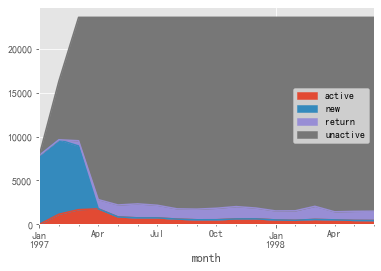

In [137]:
#面积图 plot.area()
purchase_status_ct.fillna(0).T.plot.area()

In [138]:
#计算各消费状态层级用户占比
purchase_status_ct.fillna(0).T.apply(lambda x: x/x.sum(),axis=1)

# 由表可知，每月的用户消费状态变化

# -活跃用户，即持续消费的用户，对应的是消费运营的质量

# -回流用户，之前不消费本月才消费，对应的是唤回运营

# -不活跃用户，对应的是流失

,active,new,return,unactive
month,,,,
1997-01-01,0.000000,1.000000,0.000000,0.000000
1997-02-01,0.070886,0.519299,0.000000,0.409815
1997-03-01,0.071319,0.307510,0.025244,0.595927
1997-04-01,0.075223,0.000000,0.044506,0.880272
1997-05-01,0.036148,0.000000,0.057785,0.906067
1997-06-01,0.031693,0.000000,0.067543,0.900764
1997-07-01,0.031650,0.000000,0.060840,0.907510
1997-08-01,0.025626,0.000000,0.049555,0.924820
1997-09-01,0.022401,0.000000,0.051379,0.926220


In [139]:
# 用户购买周期（按订单）
# 用户消费周期描述
order_diff=grouped_user.apply(lambda x :x.order_dt - x.order_dt.shift())
order_diff.head(10)

user_id   
1        0        NaT
2        1        NaT
         2     0 days
3        3        NaT
         4    87 days
         5     3 days
         6   227 days
         7    10 days
         8   184 days
4        9        NaT
Name: order_dt, dtype: timedelta64[ns]

In [140]:
#错位前的前10行
df.order_dt.head(10)

0   1997-01-01
1   1997-01-12
2   1997-01-12
3   1997-01-02
4   1997-03-30
5   1997-04-02
6   1997-11-15
7   1997-11-25
8   1998-05-28
9   1997-01-01
Name: order_dt, dtype: datetime64[ns]

In [141]:
#错位函数 shift()  将时间列order_dt向上平移一行
df.order_dt.shift().head(10)

0          NaT
1   1997-01-01
2   1997-01-12
3   1997-01-12
4   1997-01-02
5   1997-03-30
6   1997-04-02
7   1997-11-15
8   1997-11-25
9   1998-05-28
Name: order_dt, dtype: datetime64[ns]

In [142]:
order_diff.describe()

count                      46089
mean     68 days 23:22:13.567662
std      91 days 00:47:33.924168
min              0 days 00:00:00
25%             10 days 00:00:00
50%             31 days 00:00:00
75%             89 days 00:00:00
max            533 days 00:00:00
Name: order_dt, dtype: object

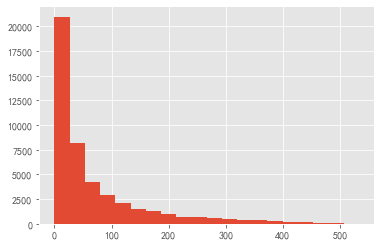

In [143]:
#用户消费周期分布
# 清洗
(order_diff / np.timedelta64(1,'D')).hist(bins=20)

In [144]:
# 用户生命周期（按第一次&最后一次消费）
# 用户生命周期描述
(user_life['max']-user_life['min']).describe()

count                       23570
mean     134 days 20:55:36.987696
std      180 days 13:46:43.039788
min               0 days 00:00:00
25%               0 days 00:00:00
50%               0 days 00:00:00
75%             294 days 00:00:00
max             544 days 00:00:00
dtype: object

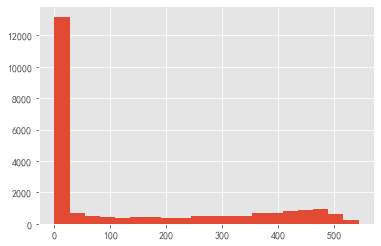

In [145]:
((user_life['max']-user_life['min'])/np.timedelta64(1,'D')).hist(bins=20)

#-用户的生命周期受只购买一次的用户影响比较大（可以排除）

#-用户均消费134天，中位数0天

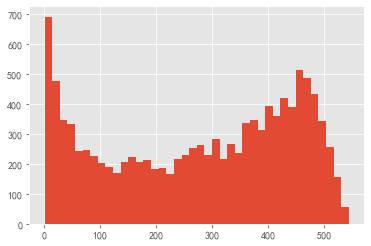

In [146]:
#排除掉只购买一次的用户
u_1=((user_life['max']-user_life['min']).reset_index()[0]/np.timedelta64(1,'D'))
u_1[u_1>0].hist(bins=40)

#-由图表前段，不稳定的用户（只消费了几次的）仍旧比较多，可以对该部分用户加强运营力度

#-对于中间不活跃的用户，可采用适当运营方式唤回

In [147]:
# 回购和复购率分析

# 复购率：自然月内，购买多次的用户占比
# 回购率：曾经购买过的用户在某一时期内的再次购买的占比

In [148]:
# 复购率
#用户每个月的消费次数
pivoted_counts=df.pivot_table(index='user_id',
                              columns='month',
                              values='order_dt',
                              aggfunc='count').fillna(0)
pivoted_counts.head()

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0


In [149]:
# applymap() 如果消费超过1次则赋值为1 若等于1则赋值为0  若无消费则赋值为空
purchase_r=pivoted_counts.applymap(lambda x: 1 if x>1 else np.NaN if x==0 else 0)
purchase_r.head()

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN


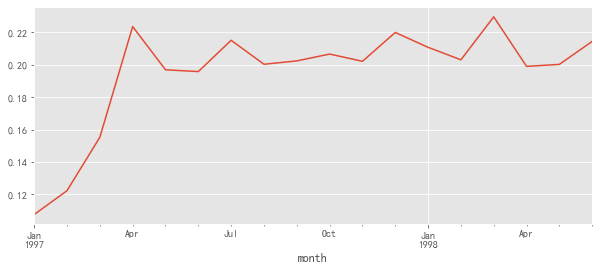

In [150]:
#  复购率= sum()复购人数 / 总消费人数count()  
# figsize 使用元祖的方式赋值 使图形形状尺寸更合适
(purchase_r.sum() / purchase_r.count()).plot(figsize=(10,4))

#复购率稳定在20%左右，
#前三个月因为有大量新用户涌入，而这批用户只购买了一次，所以导致复购率降低

In [151]:
data_purchase.head()

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5,1,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0


In [167]:
# def purchase_back(data):
#     status=[]
#     for i in range(17):
#         if data[i]==1:           # 本月进行过消费
#             if data[i+1]==1:     # 次月进行了消费
#                 status.append(1) #则标记为1
#             if data[i+1] == 0:   # 次月没消费
#                 status.append(0) # 则标记为0
#         else:                    # 当月没有消费
#             status.append(np.NaN)# 之前没消费则为空 不计入总数
#     status.append(np.NaN)        # 最后一个月  手动赋予空值
#     return status
# #应用函数 purchase_back
# # purchase_b=data_purchase.apply(purchase_back,axis=1)
# # purchase_b.head(5)

def purchase_back(data):
    status = []
    for i in range(17):
        if data[i] == 1:# 本月进行过消费
            if data[i+1] == 1:# 次月进行了消费
                status.append(1) #则标记为1
            if data[i+1] == 0:# 次月没消费
                status.append(0)# 则标记为0
        else:          # 当月没有消费
            status.append(np.NaN)# 之前没消费则为空 不计入总数
    status.append(np.NaN)        # 最后一个月  手动赋予空值
    return status
#应用函数 purchase_back
purchase_b = data_purchase.apply(purchase_back ,axis =1)
purchase_b.head(5)

user_id
1    [0, nan, nan, nan, nan, nan, nan, nan, nan, na...
2    [0, nan, nan, nan, nan, nan, nan, nan, nan, na...
3    [0, nan, 1, 0, nan, nan, nan, nan, nan, nan, 0...
4    [0, nan, nan, nan, nan, nan, nan, 0, nan, nan,...
5    [1, 0, nan, 1, 1, 1, 0, nan, 0, nan, nan, 1, 0...
dtype: object

In [168]:
#復購率
# (purchase_b.sum()/purchase_b.count()).plot(figsize=(10,4))

#前三个月用户只购买一次的情况占比一半以上，
#所以 回购率较低，中后期稳定在30%左右，
#即当月消费人数中有30%左右的用户会在下一个月再次消费，
#所以应当对该部分用户关系加强运营维护
